# Computational assignment 2

# TO DO 
- fiks plotting oppgave 1
- få til overdamped (analytisk stemmer ikke med numerisk)
- skriv om hvordan vi finner C for critical damping (initialbetingelsen omega0 = 0)
- skriv om analytisk løsning 
- Plotte energitap (work done by damping)
- kommenter oppgave 1

- hele oppgave 2


## 1) Damped harmonic motion of a pendulum

In [141]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc

In [142]:
#plotting parameters 
fontsize=15
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize, 
             'figure.titlesize':20,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (20, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}

plt.rcParams.update(newparams)

In [143]:
"""Defining functions"""
#Runge Kutta 
def Kutta4(f,t0,y0,h,nsteps,q=1,omega_D=1):
    Y=np.zeros((nsteps,2))  #2D array. Y[:,0] is theta values and Y[:,1] is omega values 
    Y[0]=y0 #initial values
    
    T=np.linspace(t0, t0 + h*nsteps, nsteps) #array of time values 
    
    for i in range(nsteps-1): 
        t=i*h
        F1= f(Y[i],t,q,omega_D)
        F2= f(Y[i] + h/2* F1,t,q,omega_D)
        F3= f(Y[i] + h/2* F2,t,q,omega_D)
        F4= f(Y[i] + h*F3,t,q,omega_D)
        
        Y[i+1]= Y[i] + h/6*(F1+2*F2+2*F3+F4) #calculating the new theta and omega values
        
    return Y,T #return array of theta and omega values, and time list


#finds the total energy per unit mass 
def total_energy(theta, omega,l): 
    E=np.zeros(len(theta)) #array of energy values 
    for i in range(len(theta)):
        E[i] = 1/2*l**2*(omega[i]**2+g/l*theta[i]**2) #calculating the energy based on theta and omega values 
    return E

The plots below

6.2631142413339385


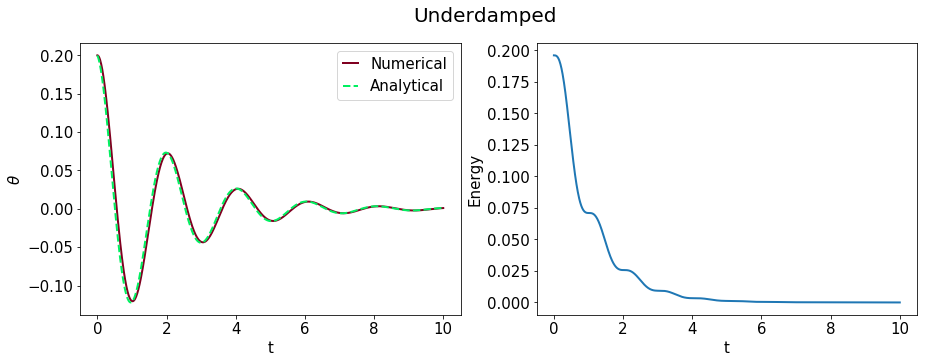

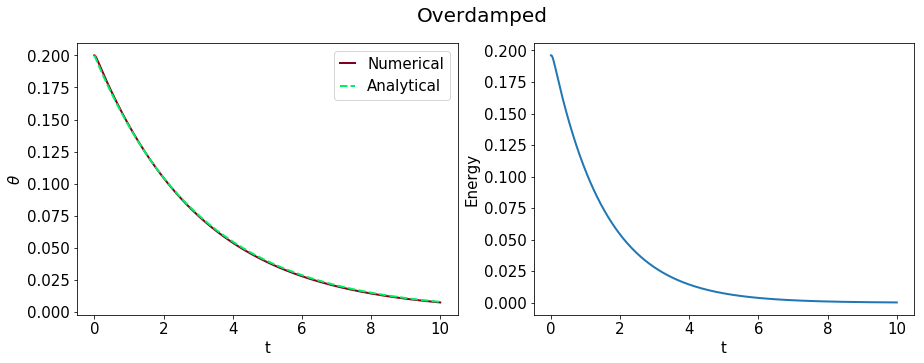

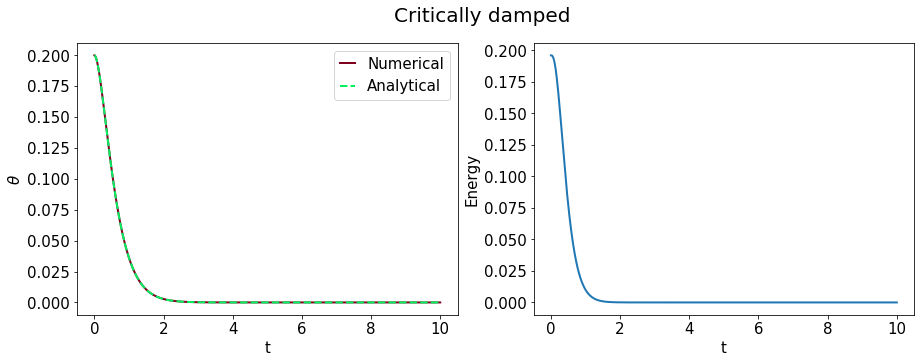

In [144]:

"""Defining constants and initial values"""
q0=1 #???????????trengs den?
delta_t=0.01 #?????????Hvilken verdi skal vi bruke????
nsteps =int(10/delta_t)   #??????Hvilken verdi skal vi bruke her da????
theta0 = 0.2
omega0 =0 
x0 = np.array([theta0,omega0])
g=sc.g
l=1
phi = np.pi/2 #Faseforskyngning (Trengs den?)


def f_damped(w,t,q,omega_D):
    return np.array([w[1],-g/l*w[0]-q*w[1]])


"""Bare en første test,SLETT?"""
#x_rk, t =  Kutta4(f2,0,x0,delta_t,nsteps,q)
#theta_damped = x_rk[:,0] 
#plt.plot(t,theta_damped)
#plt.show()
    

print(np.sqrt(4*g/l))

def plot_damped(q,analytic_sol,title): #sett sikkert inn flere parametre her
    x,t = Kutta4(f_damped,0,x0,delta_t,nsteps,q)
    theta=x[:,0]
    omega=x[:,1]
    energy=total_energy(theta, omega,l)
    theta_a=analytic_sol(t,q)
    
    f,axs=plt.subplots(2,2,figsize=(15,5))
    plt.subplot(1,2,1)
    plt.suptitle(title)
    plt.ylabel(r"$ \theta $")
    plt.xlabel("t")
    plt.plot(t,theta,color='#800020',label="Numerical")
    plt.plot(t,theta_a,color='#00f060',linestyle = '--' ,label="Analytical")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.ylabel("Energy")
    plt.xlabel("t")
    plt.plot(t,energy)

    
    
def analytic_sol_u(t,q):
    return theta0 * np.exp(-q*t/2) * np.sin(np.sqrt(g/l - q**2/4)*t + phi )
    
def analytic_sol_o(t,q):  ##pluss eller minus???????????????
    exp_fact= (q/2 - np.sqrt(q**2/4 + g/l))
    return theta0 * np.exp(exp_fact*t)
    return theta0 * np.exp(-(q/2 - np.sqrt(q**2/4 + g/l))*t)
    #return theta0 * np.exp( -(q/2 + np.sqrt(q**2/4 + g/l))*t)

def analytic_sol_c(t,q): ###Hva er C ???????????????????
    C=theta0*q/2   #hva i all verden er denne????
    return (theta0 + C*t ) * np.exp(-q*t/2)
    
    

"""Plotting"""
"""Underdamped  q^2 < 4g/l  """
q_u=1
plot_damped(q_u,analytic_sol_u,"Underdamped")

"""Overdamped q^2>4g/l"""
q_o=30
plot_damped(q_o,analytic_sol_o,"Overdamped")

"""Critically damped q"""
q_c=np.sqrt(4*g/l)
plot_damped(q_c,analytic_sol_c,"Critically damped")


## 2) Forced harmonic (damped) pendulum 

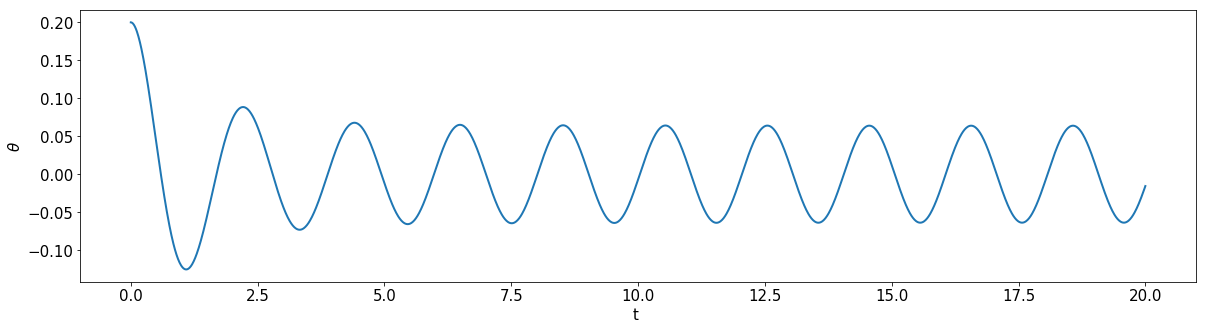

In [145]:
#default value for driving force
nsteps_f= int(20/delta_t)
Fd = 0.2
Omega_D = np.sqrt(g/l)  #prøvde å sette den til resonansfrekvensen
q0=1

def f_forced(w,t,q,omega_D):
    return np.array([w[1],-q*w[1]-g/l*w[0]+Fd*np.sin(omega_D*t+phi)])

x_forced, t = Kutta4(f_forced,0,x0,delta_t,nsteps_f,q0,Omega_D)
theta_forced=x_forced[:,0]

plt.plot(t,theta_forced)
plt.ylabel(r'$\theta$')
plt.xlabel('t ')
plt.show()



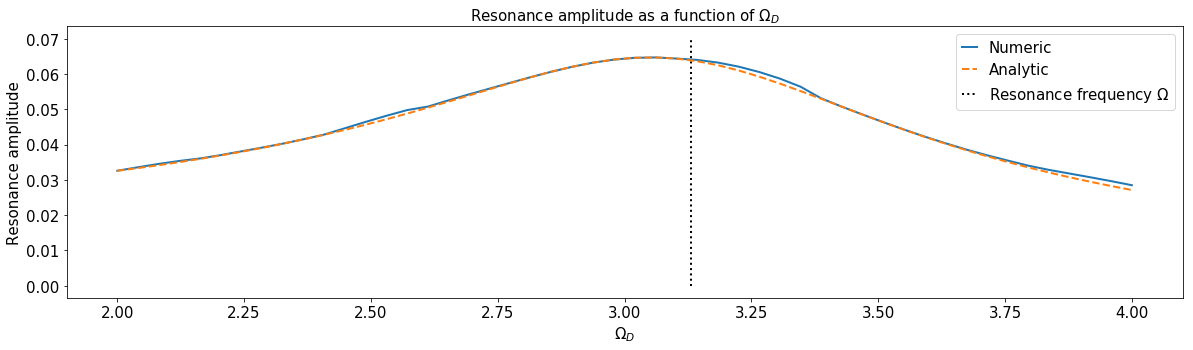

3.061224489795918
3.1315571206669692


In [152]:
"""Dependence of Omega_D"""
nsteps_omega_D = 3000

#skal finne resonans amplituden
def resonance_amplitude(theta_list):
    midle_of_list= int(nsteps_f/2)
    return np.max(theta_list[midle_of_list:])

def analytic_resonance_amplitude(Fd,omegaD=Omega_D,q=q0):
    return Fd/np.sqrt( (g/l - omegaD**2)**2 + (q*omegaD)**2 )
    
#list_of_omega_D = np.linspace(0.5,10,100) 
list_of_omega_D = np.linspace(2,4,50) ###tester bare SLETT DENNE TIL SLUTT!!!!
amplitudes_omega_D=np.zeros(len(list_of_omega_D))

for i in range(len(list_of_omega_D)):
    omega_i = list_of_omega_D[i]
    x_i, t= Kutta4(f_forced,0,x0,delta_t,nsteps_omega_D,q0,omega_i)
    theta_i = x_i[:,0]
    amplitudes_omega_D[i] = resonance_amplitude(theta_i)
    plt.plot()

analytic_ra_omega_D = analytic_resonance_amplitude(Fd,omegaD=list_of_omega_D)
    

    
plt.title(r"Resonance amplitude as a function of $\Omega_D$")
plt.plot(list_of_omega_D,amplitudes_omega_D, label = 'Numeric')
plt.plot(list_of_omega_D,analytic_ra_omega_D, linestyle='--', label = "Analytic" )
plt.xlabel(r'$\Omega_D$')
plt.ylabel('Resonance amplitude')
plt.vlines(np.sqrt(g/l),0,0.07,linestyle=':', label = r'Resonance frequency $\Omega$' )
plt.legend()
plt.show()


"""tester"""
maksIndex = np.argmax(analytic_ra_omega_D)
print(list_of_omega_D[maksIndex])
print(np.sqrt(g/l))

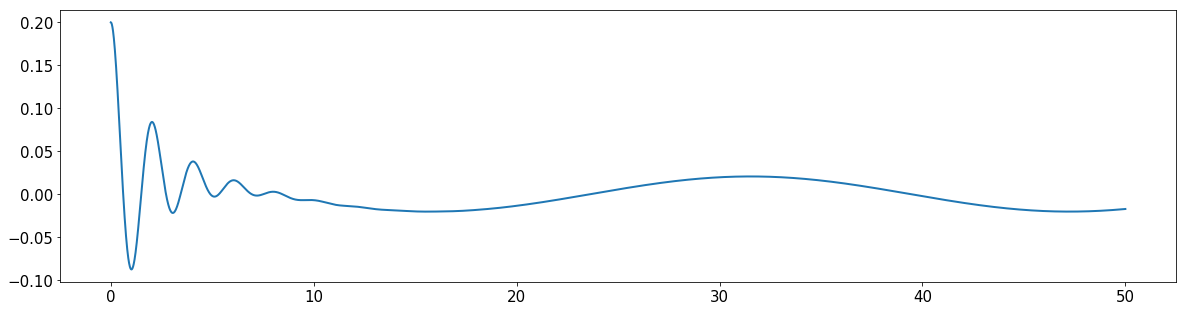

In [147]:
"""bare test"""
x_test1, t= Kutta4(f_forced,0,x0,delta_t,5000,q0,0.2)

theta_test1 = x_test1[:,0]

plt.plot(t,theta_test1)
plt.show()


In [148]:
"""test for å finne ut hvor stor tidsintervall vi må ha"""

T= 2*np.pi/0.5
print(T)

12.566370614359172


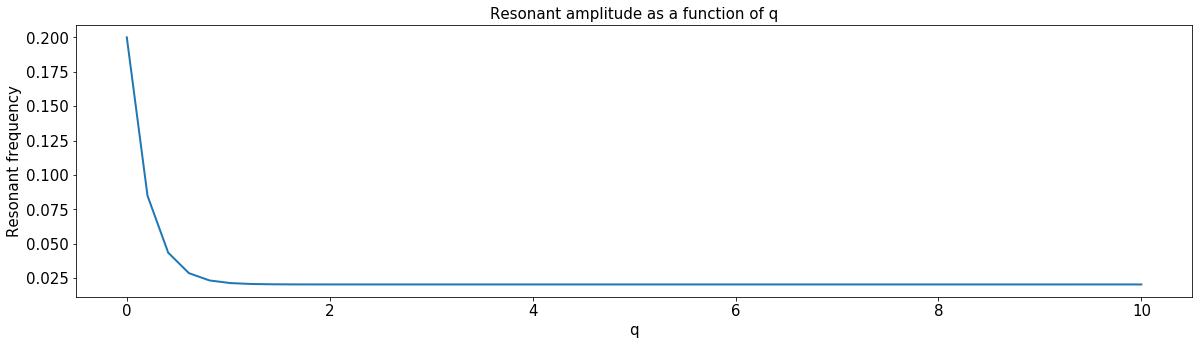

In [149]:
"Dependence of q"

qlist=np.linspace(0,10,50)
Amplitudes_qi=np.zeros(len(qlist))

for i in range(len(qlist)):
    qi = qlist[i]
    x_i, t= Kutta4(f_forced,0,x0,delta_t,nsteps_omega_D,qi,omega0)
    theta_i = x_i[:,0]
    Amplitudes_qi[i] = resonance_amplitude(x_i[:,0])

plt.title("Resonant amplitude as a function of q")
plt.xlabel("q")
plt.ylabel("Resonant frequency")
plt.plot(qlist,Amplitudes_qi)